In [198]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import geopandas as gpd
from shapely.geometry import point

In [199]:
# read in clean data csv
dd_dat = pd.read_csv('doordash_data.csv')
dd_dat.head(3)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,city_slug,latitude,longitude,...,delivery_fee_raw,delivery_fee,delivery_time_raw,delivery_time,service_fee_raw,service_fee,phone,review_count,review_rating,RunDate
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29,NaN,NaN,NaN,1364,4.8,4/25/2022 7:01
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29,NaN,NaN,NaN,1364,4.8,4/25/2022 7:01
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29,NaN,NaN,NaN,1364,4.8,4/25/2022 7:01


In [200]:
# get list of foods/services with counts
clean_dd = dd_dat.drop(['city_slug', 'delivery_fee_raw', 'delivery_fee', 'service_fee_raw', 'service_fee', 'phone', 'RunDate', 'delivery_time_raw'], axis=1)
clean_dd.head(3)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,loc_number,url,address,cuisines,delivery_time,review_count,review_rating
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8


In [201]:
clean_dd['cuisines split'] = clean_dd['cuisines'].str.split('|')
# clean_dd['cuisines'].loc[0].split("|")[0]
# t.split("|")
clean_dd.head(3)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,loc_number,url,address,cuisines,delivery_time,review_count,review_rating,cuisines split
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."


In [202]:
cleaner_dd = clean_dd.drop_duplicates(subset=['loc_name', 'latitude', 'longitude'], keep='last')
cleaner_dd.head(3)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,loc_number,url,address,cuisines,delivery_time,review_count,review_rating,cuisines split
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."
5,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.672978,-73.950462,0.404577,Taqueria Milear,133345,https://www.doordash.com/store/133345/?pickup=...,"752 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican|Tacos|Burritos|Dessert|Brunch,28,2000,4.6,"[Mexican, Tacos, Burritos, Dessert, Brunch]"
8,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.674537,-73.950007,0.298770,Cielito Lindo,328460,https://www.doordash.com/store/328460/?pickup=...,"665 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican|Breakfast|Burritos|Salads|Soup,25,163,4.7,"[Mexican, Breakfast, Burritos, Salads, Soup]"


In [203]:
# Count of orders by metro area - New York City, Chicago, Los Angeles, Boston --> Shows 4 markets analyzed
cleaner_dd['searched_metro'].value_counts()

NY    1620
LA     875
CH     848
BO     730
Name: searched_metro, dtype: int64

In [204]:
# refining definition for cuisine
int_cuisines = ['Indian',
'Italian',
'Japanese',
'Mexican',
'Thai',
'Chinese',
'French',
'Turkish',
'Greek',
'Arab',
'Spanish',
'Vietnamese',
'Korean',
'Malaysian',
'Russian',
'Ethiopian',
'Caribbean',
'African',
'American']

In [279]:
# create dataframe for each city's cuisine

# New York
NY_cuisines = {'cuisine': NY_cuisine_types['cuisines split'].value_counts().index, 'count': NY_cuisine_types['cuisines split'].value_counts().values}
NY_cuisines = pd.DataFrame(NY_cuisines)
final_NY_cuis = NY_cuisines[NY_cuisines['cuisine'].isin(int_cuisines)]

# Chicago
CH_cuisines = {'cuisine': CH_cuisine_types['cuisines split'].value_counts().index, 'count': CH_cuisine_types['cuisines split'].value_counts().values}
CH_cuisines = pd.DataFrame(CH_cuisines)
final_CH_cuis = CH_cuisines[CH_cuisines['cuisine'].isin(int_cuisines)]

# Boston
BO_cuisines = {'cuisine': BO_cuisine_types['cuisines split'].value_counts().index, 'count': BO_cuisine_types['cuisines split'].value_counts().values}
BO_cuisines = pd.DataFrame(BO_cuisines)
final_BO_cuis = BO_cuisines[BO_cuisines['cuisine'].isin(int_cuisines)]

#Los Angeles
LA_cuisines = {'cuisine': LA_cuisine_types['cuisines split'].value_counts().index, 'count': LA_cuisine_types['cuisines split'].value_counts().values}
LA_cuisines = pd.DataFrame(LA_cuisines)
final_LA_cuis = LA_cuisines[LA_cuisines['cuisine'].isin(int_cuisines)]


In [280]:
# refining definition for convenience
convenience = ['Grocery',
              'Home Goods',
              'Beer,Wine & Spirits',
               'Personal Care',
               'Baby',
               'Medicine',
               'Convenience',
               'Gifts',
               'Florist',
               'Pet Care',
               'Grooming'
              ]

In [281]:
# create dataframe for NY convenience
NY = cleaner_dd['searched_metro'] == 'NY'
NY_temp = cleaner_dd['cuisines split'].where(NY)
NY_temp = NY_temp.explode().dropna()
NY_temp.value_counts()
NY_cuisine_types = NY_temp.reset_index()
NY_cuisine_types = NY_cuisine_types.drop(columns='index')
NY_cuisine_types
#all_cuisine_types.values
NY_cuisines = {'cuisine': NY_cuisine_types['cuisines split'].value_counts().index, 'count': NY_cuisine_types['cuisines split'].value_counts().values}
NY_cuisines = pd.DataFrame(NY_cuisines)
final_NY_con = NY_cuisines[NY_cuisines['cuisine'].isin(convenience)]
final_NY_con


,cuisine,count
47,Grocery,34
61,Convenience,24
120,Personal Care,10
123,Florist,10
142,Home Goods,8
154,Baby,7
165,Medicine,6
265,Pet Care,2


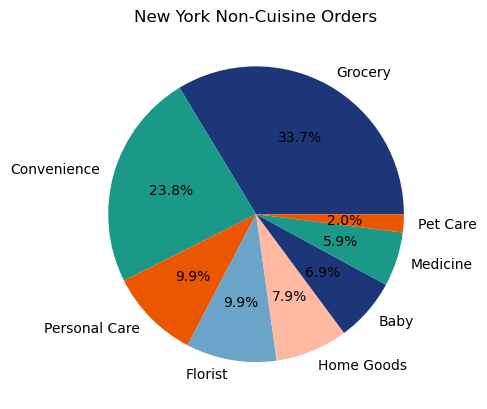

In [282]:
# create pie chart - NY
plt.figure(0)
labels = final_NY_con['cuisine']
sizes = final_NY_con['count']
colors = {'#1A9988', '#6AA4C8', '#EB5600', '#1C3678', '#FFB8A2'}
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("New York Non-Cuisine Orders")
# get png output for group powerpoint - NY
plt.savefig("NYnco.png")
plt.show()

In [283]:
CH = cleaner_dd['searched_metro'] == 'CH'
CH_temp = cleaner_dd['cuisines split'].where(CH)
CH_temp = CH_temp.explode().dropna()
CH_temp.value_counts()
CH_cuisine_types = CH_temp.reset_index()
CH_cuisine_types = CH_cuisine_types.drop(columns='index')
CH_cuisine_types
#all_cuisine_types.values
CH_cuisines = {'cuisine': CH_cuisine_types['cuisines split'].value_counts().index, 'count': CH_cuisine_types['cuisines split'].value_counts().values}
CH_cuisines = pd.DataFrame(CH_cuisines)
final_CH_con = CH_cuisines[CH_cuisines['cuisine'].isin(convenience)]
final_CH_con

,cuisine,count
42,Grocery,21
47,Convenience,19
66,Personal Care,13
86,Medicine,9
87,Baby,9
88,Home Goods,9
90,Pet Care,8
125,Florist,5


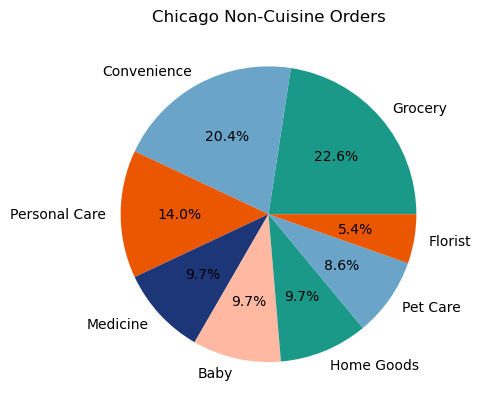

In [284]:
plt.figure(1)
labels = final_CH_con['cuisine']
sizes = final_CH_con['count']
title = ("Chicago Non-Cuisine Orders")
colors = ['#1A9988','#6AA4C8','#EB5600','#1C3678','#FFB8A2']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Chicago Non-Cuisine Orders")
plt.show()

In [285]:
BO = cleaner_dd['searched_metro'] == 'BO'
BO_temp = cleaner_dd['cuisines split'].where(BO)
BO_temp = BO_temp.explode().dropna()
BO_temp.value_counts()
BO_cuisine_types = BO_temp.reset_index()
BO_cuisine_types = BO_cuisine_types.drop(columns='index')
BO_cuisine_types
#all_cuisine_types.values
BO_cuisines = {'cuisine': BO_cuisine_types['cuisines split'].value_counts().index, 'count': BO_cuisine_types['cuisines split'].value_counts().values}
BO_cuisines = pd.DataFrame(BO_cuisines)
final_BO_con = BO_cuisines[BO_cuisines['cuisine'].isin(convenience)]
final_BO_con

,cuisine,count
22,Grocery,34
26,Convenience,29
38,Personal Care,21
49,Home Goods,17
53,Baby,15
58,Medicine,14
169,Pet Care,3
174,Florist,3


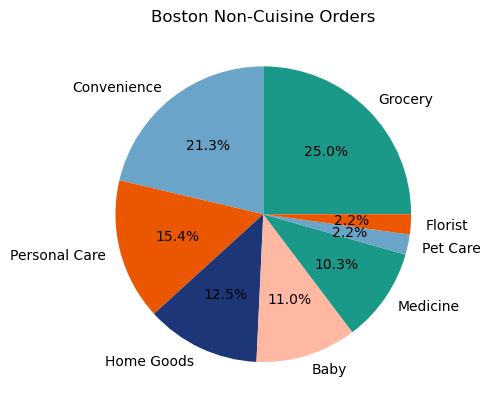

In [286]:
plt.figure(2)
labels = final_BO_con['cuisine']
sizes = final_BO_con['count']
colors = ['#1A9988','#6AA4C8','#EB5600','#1C3678','#FFB8A2']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Boston Non-Cuisine Orders")
plt.show()

In [287]:
LA = cleaner_dd['searched_metro'] == 'LA'
LA_temp = cleaner_dd['cuisines split'].where(LA)
LA_temp = LA_temp.explode().dropna()
LA_temp.value_counts()
LA_cuisine_types = LA_temp.reset_index()
LA_cuisine_types = LA_cuisine_types.drop(columns='index')
LA_cuisine_types
#all_cuisine_types.values
LA_cuisines = {'cuisine': LA_cuisine_types['cuisines split'].value_counts().index, 'count': LA_cuisine_types['cuisines split'].value_counts().values}
LA_cuisines = pd.DataFrame(LA_cuisines)
final_LA_con = LA_cuisines[LA_cuisines['cuisine'].isin(convenience)]
final_LA_con

,cuisine,count
18,Convenience,52
23,Grocery,44
38,Personal Care,25
44,Home Goods,23
61,Baby,15
63,Medicine,14
103,Pet Care,7
337,Florist,1


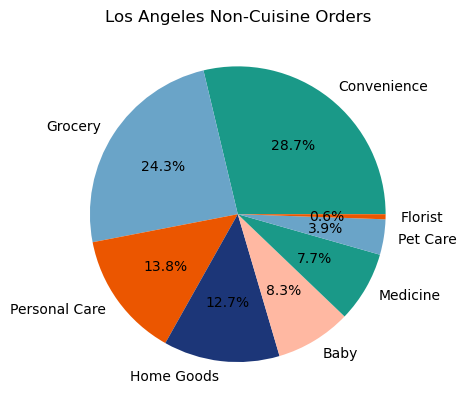

In [288]:
plt.figure(3)
labels = final_LA_con['cuisine']
sizes = final_LA_con['count']
colors = ['#1A9988','#6AA4C8','#EB5600','#1C3678','#FFB8A2']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Los Angeles Non-Cuisine Orders")
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

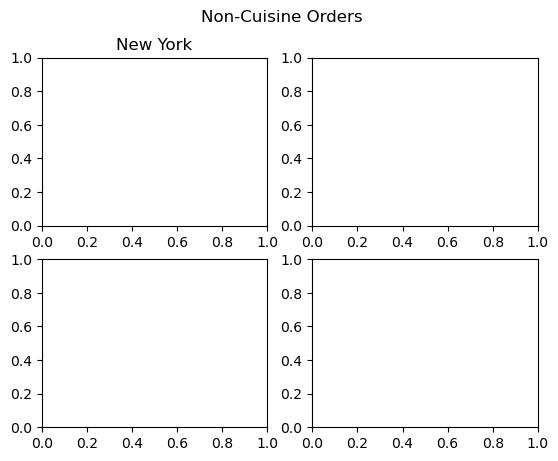

In [289]:
# create single png with all four pie charts
fig, axs = plt.subplots(2, 2)
fig.suptitle("Non-Cuisine Orders")
colors = {'#1A9988', '#6AA4C8', '#EB5600', '#1C3678', '#FFB8A2'}
# new york
plt.subplot(221)
plt.gca().set_title('New York')
labels = final_NY_con['cuisine']
sizes = final_NY_con['count']
axs[0,0].bar(sizes,labels=labels,labeldistance=None,colors=colors,autopct='%1.1f%%')
#draw circle
#centre_circle = plt.Circle((0,0),0.70,fc='white')
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)

# chicago
plt.subplot(222)
plt.gca().set_title('Chicago')
labels = final_CH_con['cuisine']
sizes = final_CH_con['count']
axs[0,1].pie(sizes,labels=labels,labeldistance=None,colors=colors,autopct='%1.1f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# boston
plt.subplot(223)
plt.gca().set_title('Boston')
labels = final_BO_con['cuisine']
sizes = final_BO_con['count']
axs[1,0].pie(sizes,labels=labels,labeldistance=None,colors=colors,autopct='%1.1f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# los angeles
plt.subplot(224)
plt.gca().set_title('Los Angeles')
labels = final_LA_con['cuisine']
sizes = final_LA_con['count']
axs[1,1].pie(sizes,labels=labels,labeldistance=None,colors=colors,autopct='%1.1f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)

# display
plt.show()

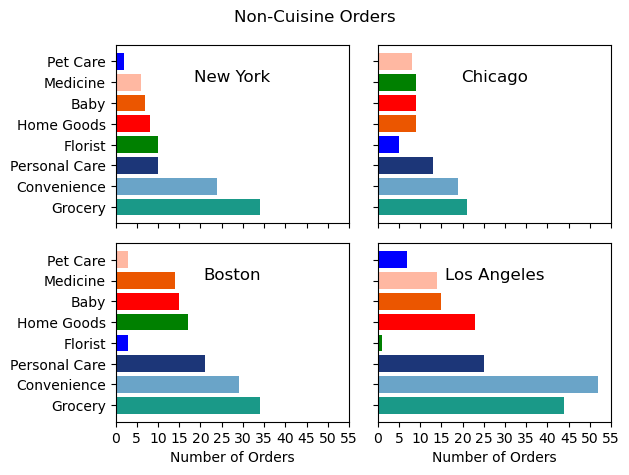

In [364]:
# create single png with all four bar charts
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)
fig.suptitle("Non-Cuisine Orders")

# New York
plt.subplot(221)
plt.gca().set_title('New York',y=.75)
colors = {'Grocery':'#1A9988', 'Convenience':'#6AA4C8', 'Baby':'#EB5600', 'Personal Care':'#1C3678', 'Florist': 'green','Home Goods':'red','Medicine':'#FFB8A2','Pet Care':'blue'}
c = final_NY_con['cuisine'].apply(lambda x: colors[x])
labels = final_NY_con['cuisine']
sizes = final_NY_con['count']
bars = plt.barh(labels,sizes,color=c)
plt.xticks(range(0,60,5))


# Chicago
plt.subplot(222)
plt.gca().set_title('Chicago',y=.75)
colors = {'Grocery':'#1A9988', 'Convenience':'#6AA4C8', 'Baby':'#EB5600', 'Personal Care':'#1C3678', 'Florist': 'green','Home Goods':'red','Medicine':'#FFB8A2','Pet Care':'blue'}
c = final_NY_con['cuisine'].apply(lambda x: colors[x])
labels = final_CH_con['cuisine']
sizes = final_CH_con['count']
bars = plt.barh(labels,sizes,color=c)
plt.xticks(range(0,60,5))
 
# Boston
plt.subplot(223)
plt.gca().set_title('Boston',y=.75)
labels = final_BO_con['cuisine']
colors = {'Grocery':'#1A9988', 'Convenience':'#6AA4C8','Baby':'#EB5600','Personal Care':'#1C3678','Florist':'green','Home Goods':'red','Medicine':'#FFB8A2','Pet Care':'blue'}
c = final_NY_con['cuisine'].apply(lambda x: colors[x])
sizes = final_BO_con['count']
bars = plt.barh(labels, sizes,color=c)
plt.xlabel("Number of Orders")
plt.xticks(range(0,60,5))

# Los Angeles
plt.subplot(224)
plt.gca().set_title('Los Angeles',y=.75)
labels = final_LA_con['cuisine']
colors = {'Grocery':'#1A9988', 'Convenience':'#6AA4C8','Baby':'#EB5600','Personal Care':'#1C3678','Florist':'green','Home Goods':'red','Medicine':'#FFB8A2','Pet Care':'blue'}
c = final_LA_con['cuisine'].apply(lambda x: colors[x])
sizes = final_LA_con['count']
bars = plt.barh(labels, sizes,color=c)
plt.xlabel("Number of Orders")
plt.xticks(range(0,60,5))

plt.tight_layout()



In [291]:
# get total cuisine and total convenience orders for each city

# New York
total_NY_cuis = sum(final_NY_cuis['count'])
total_NY_con = sum(final_NY_con['count'])

# Chicago
total_CH_cuis = sum(final_CH_cuis['count'])
total_CH_con = sum(final_CH_con['count'])

# Boston
total_BO_cuis = sum(final_BO_cuis['count'])
total_BO_con = sum(final_BO_con['count'])

# Los Angeles
total_LA_cuis = sum(final_LA_cuis['count'])
total_LA_con = sum(final_LA_con['count'])

In [292]:
# make cuisine vs convenience data frame for each city

# NY
NY_cuisVcon = {'cuis/con':['Cuisine','Convenience'], 'count': [total_NY_cuis,total_NY_con]}
NY_cuisVcon = pd.DataFrame(NY_cuisVcon)

# CH
CH_cuisVcon = {'cuis/con':['Cuisine','Convenience'], 'count': [total_CH_cuis,total_CH_con]}
CH_cuisVcon = pd.DataFrame(CH_cuisVcon)

# BO
BO_cuisVcon = {'cuis/con':['Cuisine','Convenience'], 'count': [total_BO_cuis,total_BO_con]}
BO_cuisVcon = pd.DataFrame(BO_cuisVcon)

# LA
LA_cuisVcon = {'cuis/con':['Cuisine','Convenience'], 'count': [total_LA_cuis,total_LA_con]}
LA_cuisVcon = pd.DataFrame(LA_cuisVcon)

,cuis/con,count
0,Cuisine,405
1,Convenience,181


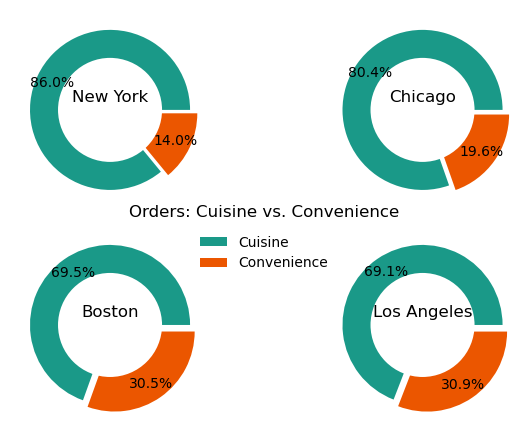

In [343]:
# make figure containing four cities' cuisine vs convenience pie charts
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)
fig.suptitle("Orders: Cuisine vs. Convenience", y=0.5)

# new york
plt.subplot(221)
plt.gca().set_title('New York', y=.5)
labels = NY_cuisVcon['cuis/con']
colors ='#1A9988','#EB5600'
sizes = NY_cuisVcon['count']
myexplode = [0,0.1]
#axs[0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=myexplode,autopct='%1.1f%%',pctdistance=0.8,labeldistance=None)
# draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

# Chicago
plt.subplot(222)
plt.gca().set_title('Chicago', y=.5)
labels = CH_cuisVcon['cuis/con']
colors ='#1A9988','#EB5600'
sizes = CH_cuisVcon['count']
myexplode = [0,0.1]
#axs[0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=myexplode,autopct='%1.1f%%',pctdistance=0.8,labeldistance=None)
# draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

# Boston
plt.subplot(223)
plt.gca().set_title('Boston', y=.5)
labels = BO_cuisVcon['cuis/con']
colors ='#1A9988','#EB5600'
sizes = BO_cuisVcon['count']
myexplode = [0,0.1]
#axs[0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=myexplode,autopct='%1.1f%%',pctdistance=0.8,labeldistance=None)
# draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Los Angeles
plt.subplot(224)
plt.gca().set_title('Los Angeles', y=.5)
labels = LA_cuisVcon['cuis/con']
colors ='#1A9988','#EB5600'
sizes = LA_cuisVcon['count']
myexplode = [0,0.1]
#axs[0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=myexplode,autopct='%1.1f%%',pctdistance=0.8,labeldistance=None)
# draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

fig.legend(['Cuisine', 'Convenience'], bbox_to_anchor=[0.5, 0.4], 
           loc='center', ncol=1, frameon=False)
ratio = 0.75
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

plt.show()
fig.savefig('orderpies.png', transparent=True)